# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split


# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Loading the dataset

In [3]:
loan_modelling_df = pd.read_csv("Loan_Modelling.csv")
loan_modelling_df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## Data Overview

* Observations
* Sanity checks

### Understand the shape of the dataset.

In [4]:
loan_modelling_df.shape


(5000, 14)

### Check data types of all columns.


In [5]:
loan_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All the columns are numeric , so we dont have to convert any column attributes.


### Check for Nulls 

In [6]:
loan_modelling_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no null values in any column


### Drop ID column, which is not needed

In [7]:
loan_modelling_df.drop(["ID"], axis=1, inplace=True)

### Check statistical summary of all columns 

In [8]:
loan_modelling_df.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

# Univariate Analysis

In [9]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

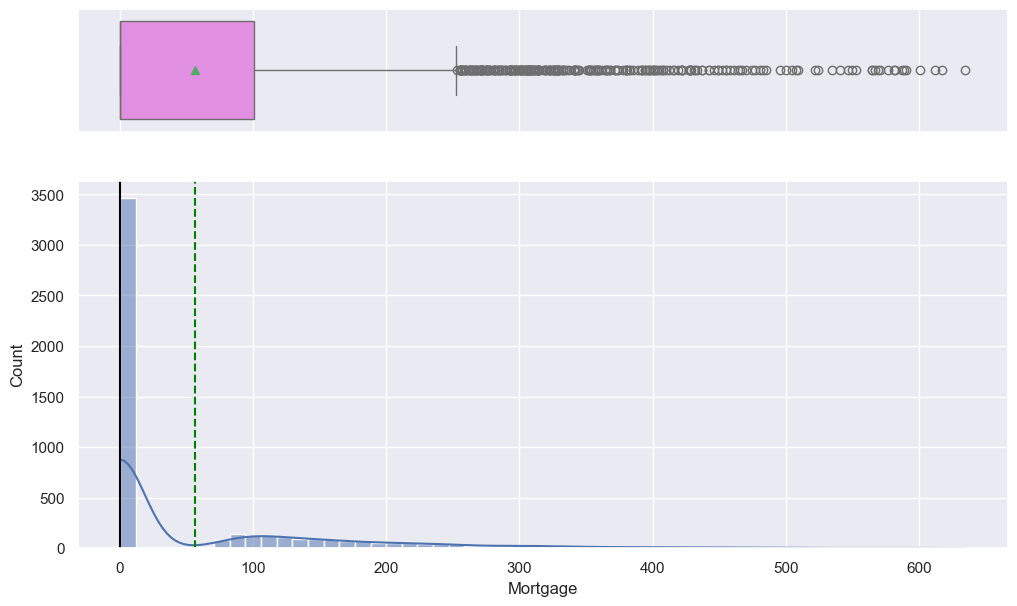

In [10]:
histogram_boxplot(loan_modelling_df, "Mortgage", kde=True)

* The Distribution of morgage is highly right screwed. There are too many outliers.

### Check the count who has CreditCard and who doesn't have.

In [11]:
loan_modelling_df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

* There are 1470 customers have Credit cards

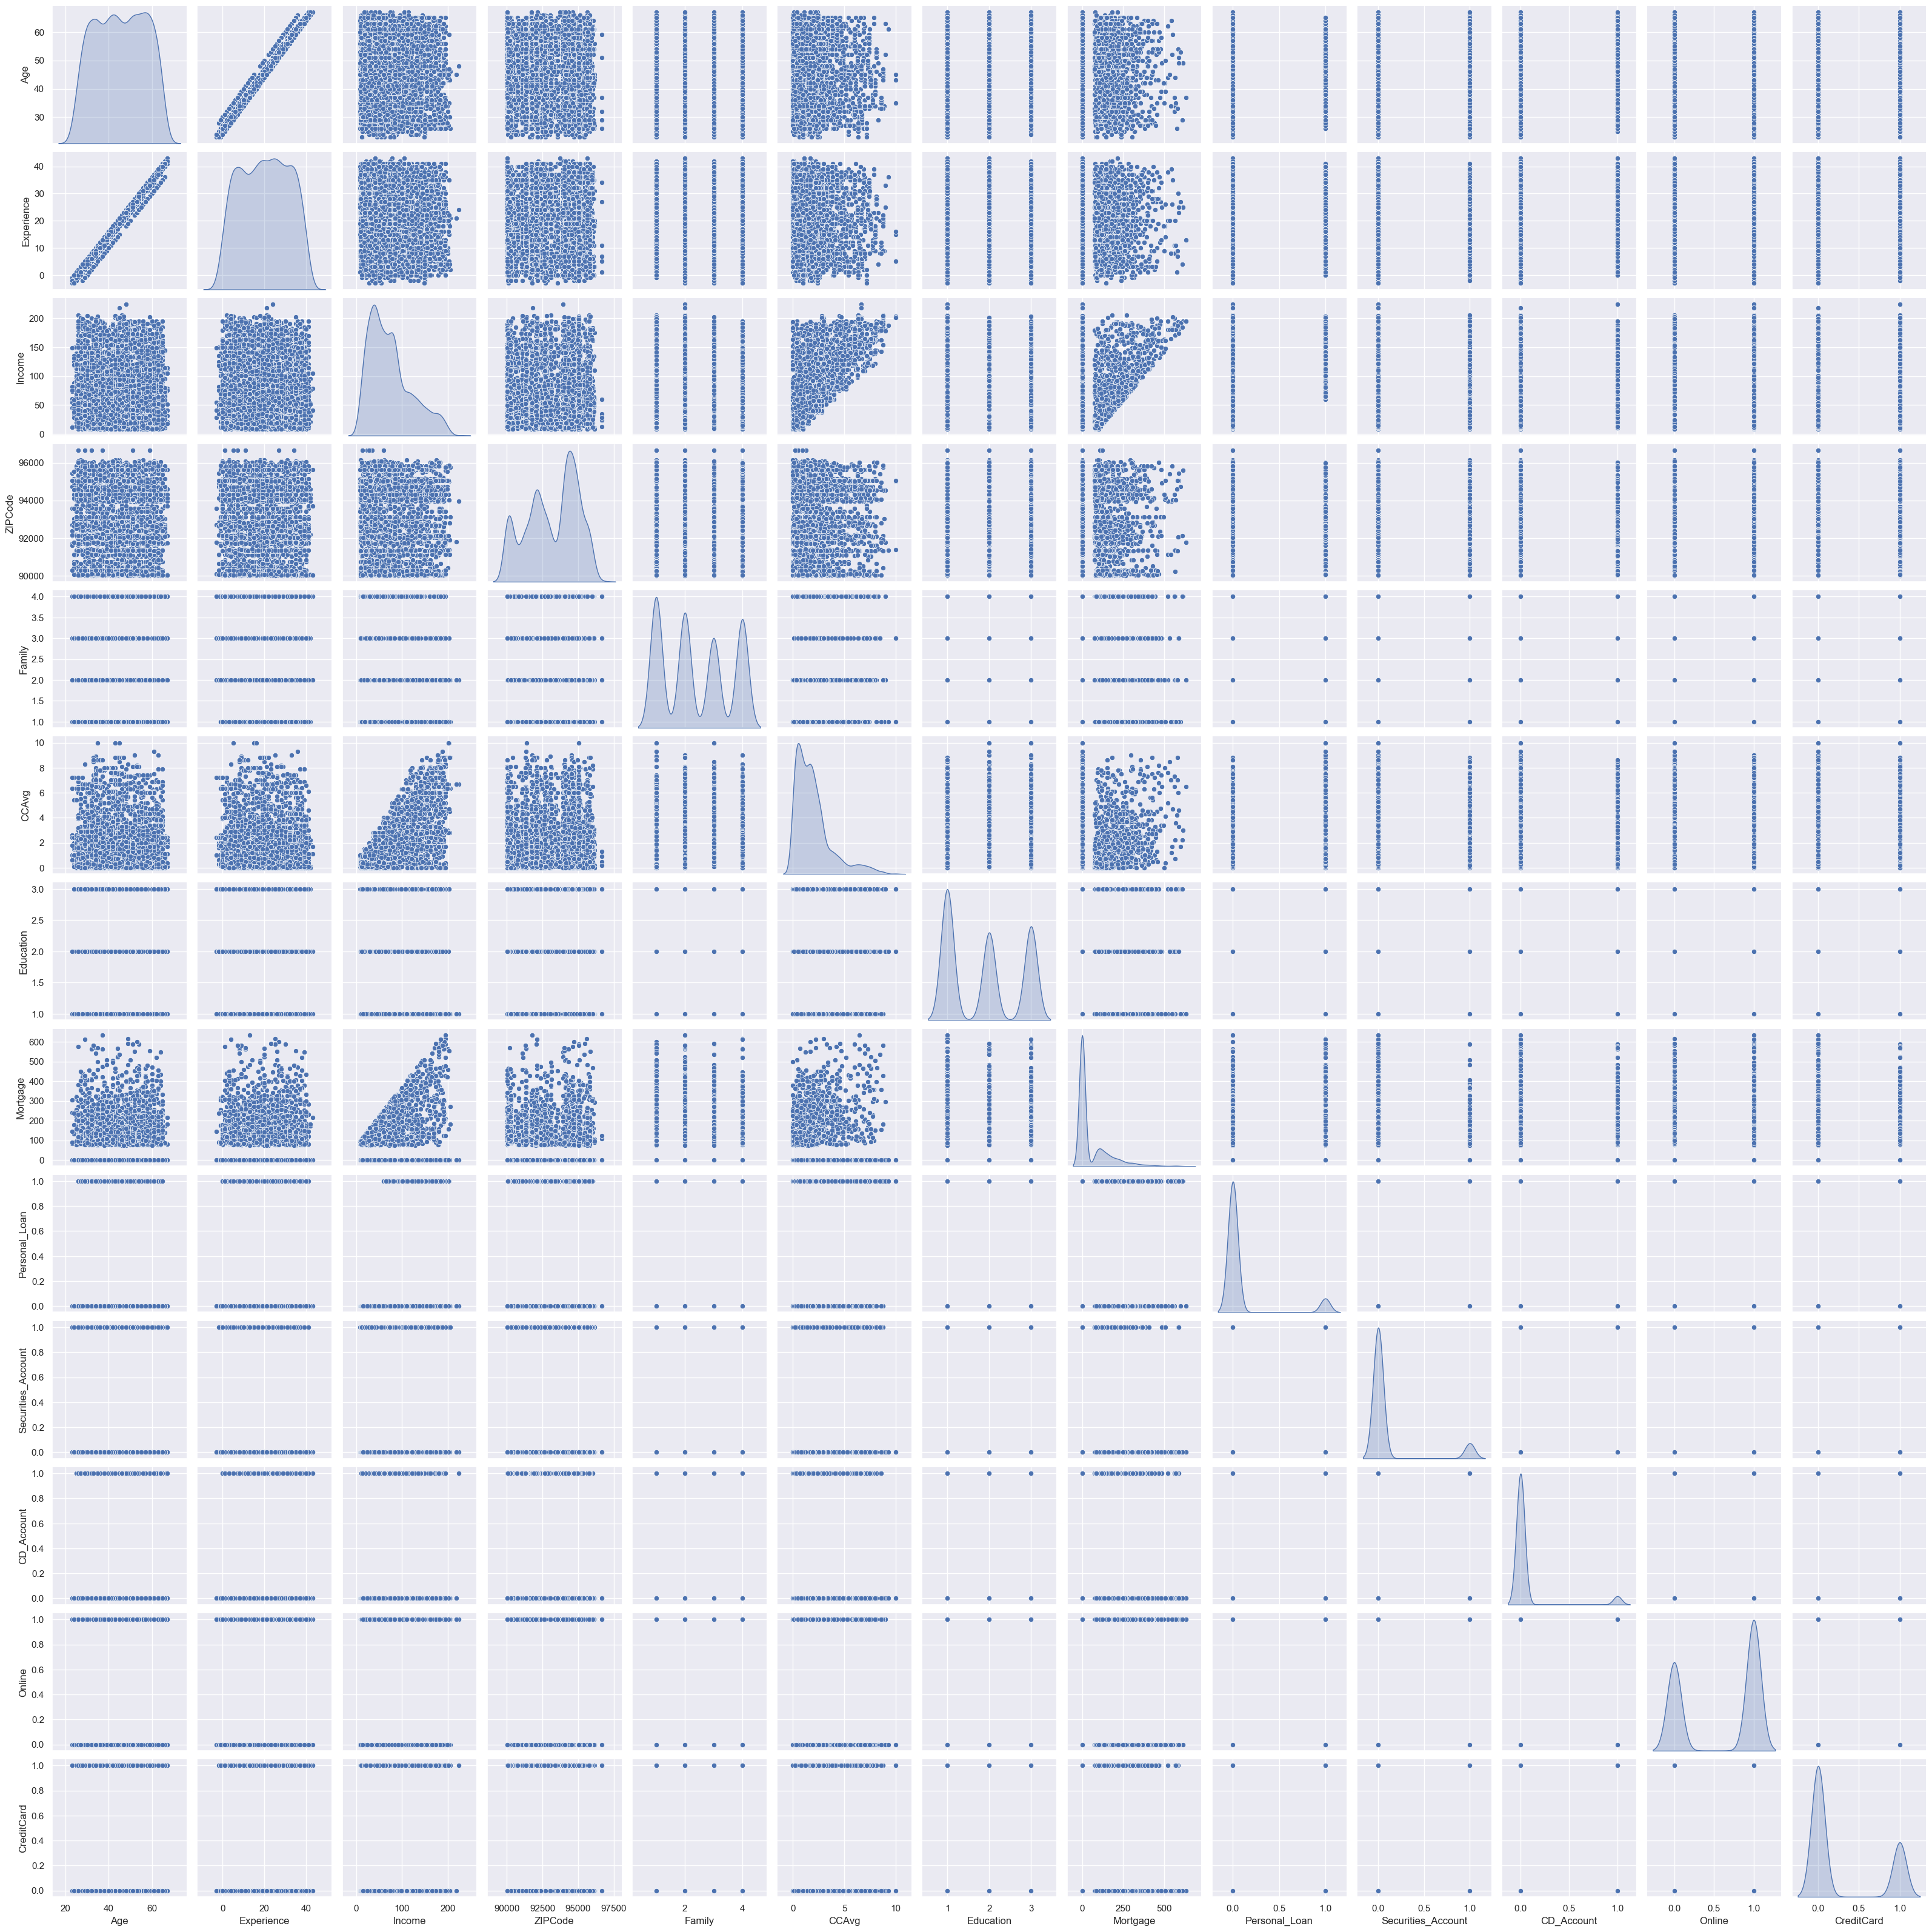

In [12]:
sns.pairplot(data=loan_modelling_df, diag_kind="kde", kind="scatter", markers=["o", "s", "D"], palette="husl")



plt.show()

### Check correlation of various columns with each other using Heatmap

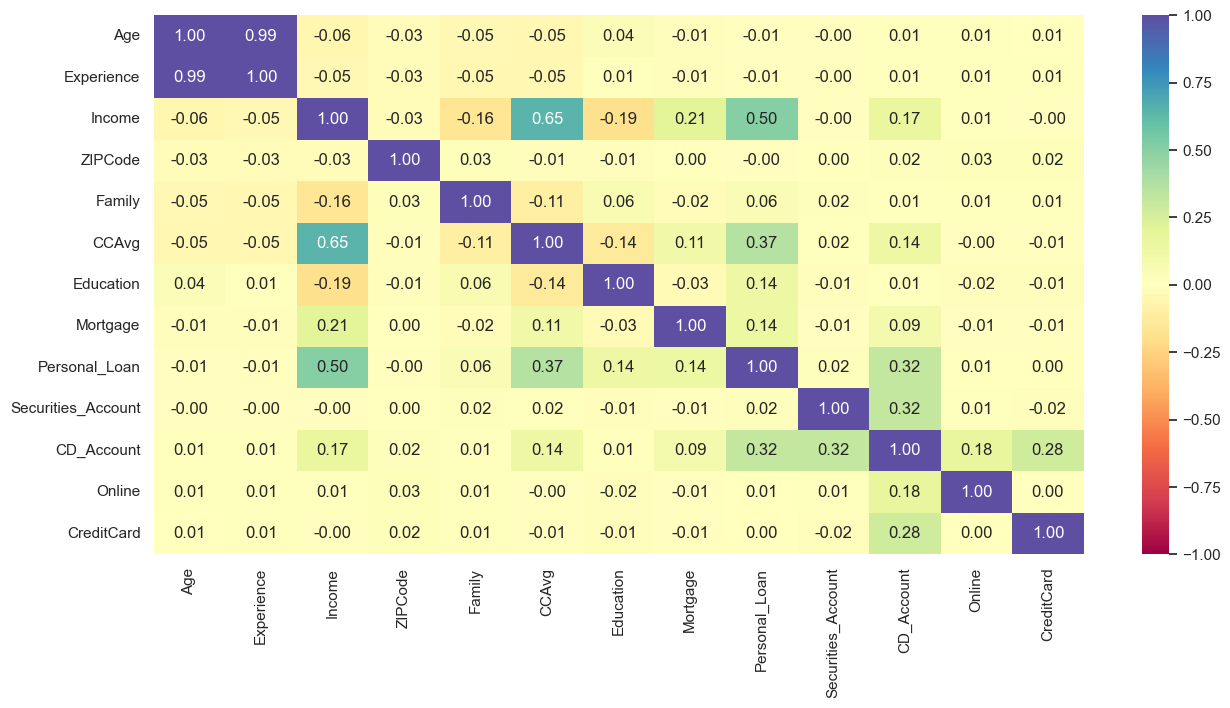

In [13]:
#num_var = ['cost_of_the_order','rating_new','day_of_the_week_new','food_preparation_time','delivery_time']

corr = loan_modelling_df.corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* The strong co-rrelation with Personal_Loan is Income(0.50 ) and CCAvg (0.37). Experience and Age are highly correlated with each other , we can remove one of the column

# Bivariate Analysis

In [14]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [15]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Check How 'Personal_Loan' varies with 'Age'

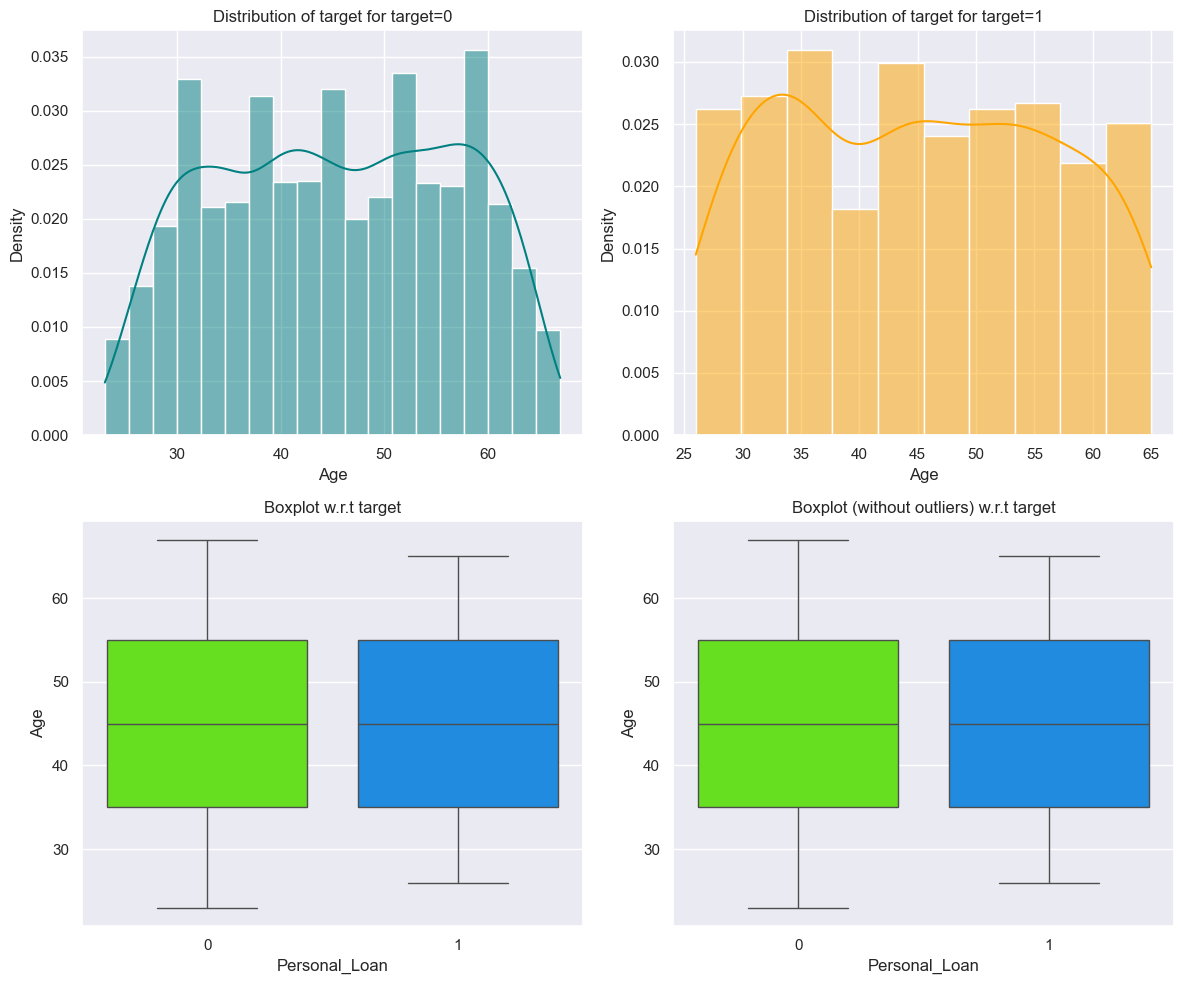

In [16]:
distribution_plot_wrt_target(loan_modelling_df, "Age", "Personal_Loan")

* Customers from various age are taking loan , so there is no clear distinction between who is taking loan and who is not taking loan

### Let's check how 'Personal_Loan' varies with customer's Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


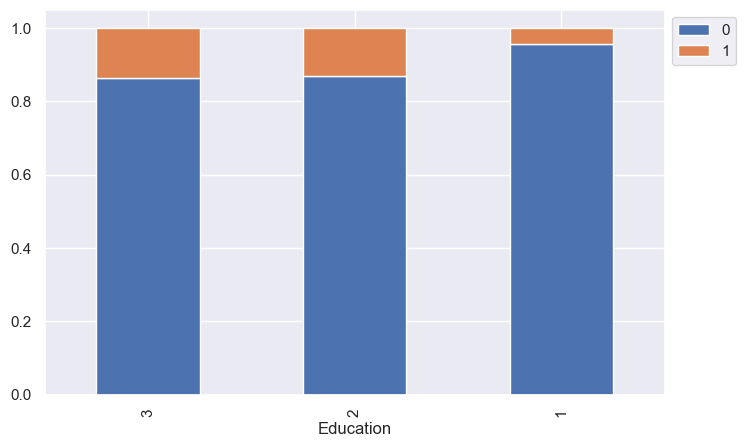

In [17]:
stacked_barplot(loan_modelling_df, "Education", "Personal_Loan")


* Most Loan purchasers are Advanced Professional and Least one are undergrads 

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [18]:
loan_modelling_df["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

* Experience has negative values, these can be removed or replaced..But mostly we will skip this column as it is high;y correlated with Age. We will keep Age

In [19]:
loan_modelling_df["Age"].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

# Check unique values in zip code and Education columns

In [20]:
loan_modelling_df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [21]:
loan_modelling_df['ZIPCode'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
93077      1
94598      1
Name: ZIPCode, Length: 467, dtype: int64

### Data Preparation for Modeling

In [22]:
X= loan_modelling_df.drop (['Personal_Loan', 'Experience'], axis=1)
y= loan_modelling_df['Personal_Loan']
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X.head()


Age  Income  Family  CCAvg  Mortgage  Securities_Account  CD_Account  \
0   25      49       4    1.6         0                   1           0   
1   45      34       3    1.5         0                   1           0   
2   39      11       1    1.0         0                   0           0   
3   35     100       1    2.7         0                   0           0   
4   35      45       4    1.0         0                   0           0   

   Online  CreditCard  ZIPCode_90007  ZIPCode_90009  ZIPCode_90011  \
0       0           0              0              0              0   
1       0           0              0              0              0   
2       0           0              0              0              0   
3       0           0              0              0              0   
4       0           1              0              0              0   

   ZIPCode_90016  ZIPCode_90018  ZIPCode_90019  ZIPCode_90024  ZIPCode_90025  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ZIPCode_90027  ZIPCode_90028  ZIPCode_90029  ZIPCode_90032  ZIPCode_90033  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ZIPCode_90034  ZIPCode_90035  ZIPCode_90036  ZIPCode_90037  ZIPCode_90041  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ZIPCode_90044  ZIPCode_90045  ZIPCode_90048  ZIPCode_90049  ZIPCode_90057  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ZIPCode_90058  ZIPCode_90059  ZIPCode_90064  ZIPCode_90065  ZIPCode_90066  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ZIPCode_90068  ZIPCode_90071  ZIPCode_90073  ZIPCode_90086  ZIPCode_90089  \
0              0              0              0              0              0   
1              0              0              0              0              1   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ZIPCode_90095  ZIPCode_90210  ZIPCode_90212  ZIPCode_90230  ZIPCode_90232  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2    

In [23]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

## Model Building

### Model Evaluation Criterion

* We are using Decision Tree Classifier model here , as model need To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Model Building

In [24]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

### Model Performance Improvement

In [25]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [26]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [27]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

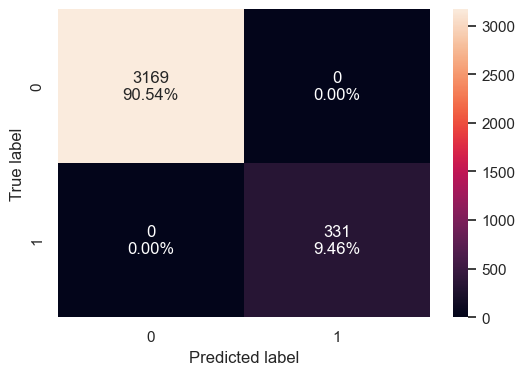

In [28]:
confusion_matrix_sklearn(model, X_train, y_train)

In [29]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0     0.984  0.879195   0.956204  0.916084

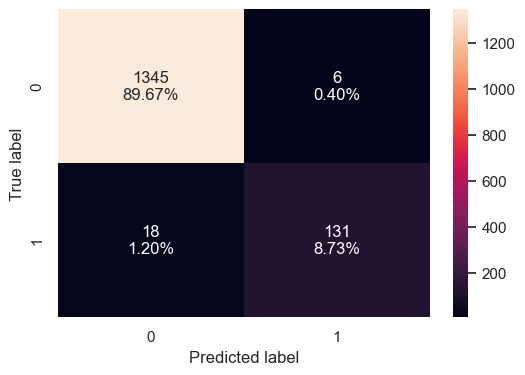

In [30]:
confusion_matrix_sklearn(model, X_test, y_test)

* Model is giving good and generalized results on training and test set.

In [31]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_90007', 'ZIPCode_90009', 'ZIPCode_90011', 'ZIPCode_90016', 'ZIPCode_90018', 'ZIPCode_90019', 'ZIPCode_90024', 'ZIPCode_90025', 'ZIPCode_90027', 'ZIPCode_90028', 'ZIPCode_90029', 'ZIPCode_90032', 'ZIPCode_90033', 'ZIPCode_90034', 'ZIPCode_90035', 'ZIPCode_90036', 'ZIPCode_90037', 'ZIPCode_90041', 'ZIPCode_90044', 'ZIPCode_90045', 'ZIPCode_90048', 'ZIPCode_90049', 'ZIPCode_90057', 'ZIPCode_90058', 'ZIPCode_90059', 'ZIPCode_90064', 'ZIPCode_90065', 'ZIPCode_90066', 'ZIPCode_90068', 'ZIPCode_90071', 'ZIPCode_90073', 'ZIPCode_90086', 'ZIPCode_90089', 'ZIPCode_90095', 'ZIPCode_90210', 'ZIPCode_90212', 'ZIPCode_90230', 'ZIPCode_90232', 'ZIPCode_90245', 'ZIPCode_90250', 'ZIPCode_90254', 'ZIPCode_90266', 'ZIPCode_90272', 'ZIPCode_90274', 'ZIPCode_90275', 'ZIPCode_90277', 'ZIPCode_90280', 'ZIPCode_90291', 'ZIPCode_90304', 'ZIPCode_90401', 'ZIPCode_90404', 'ZIPCode_90405', 'ZIPCod

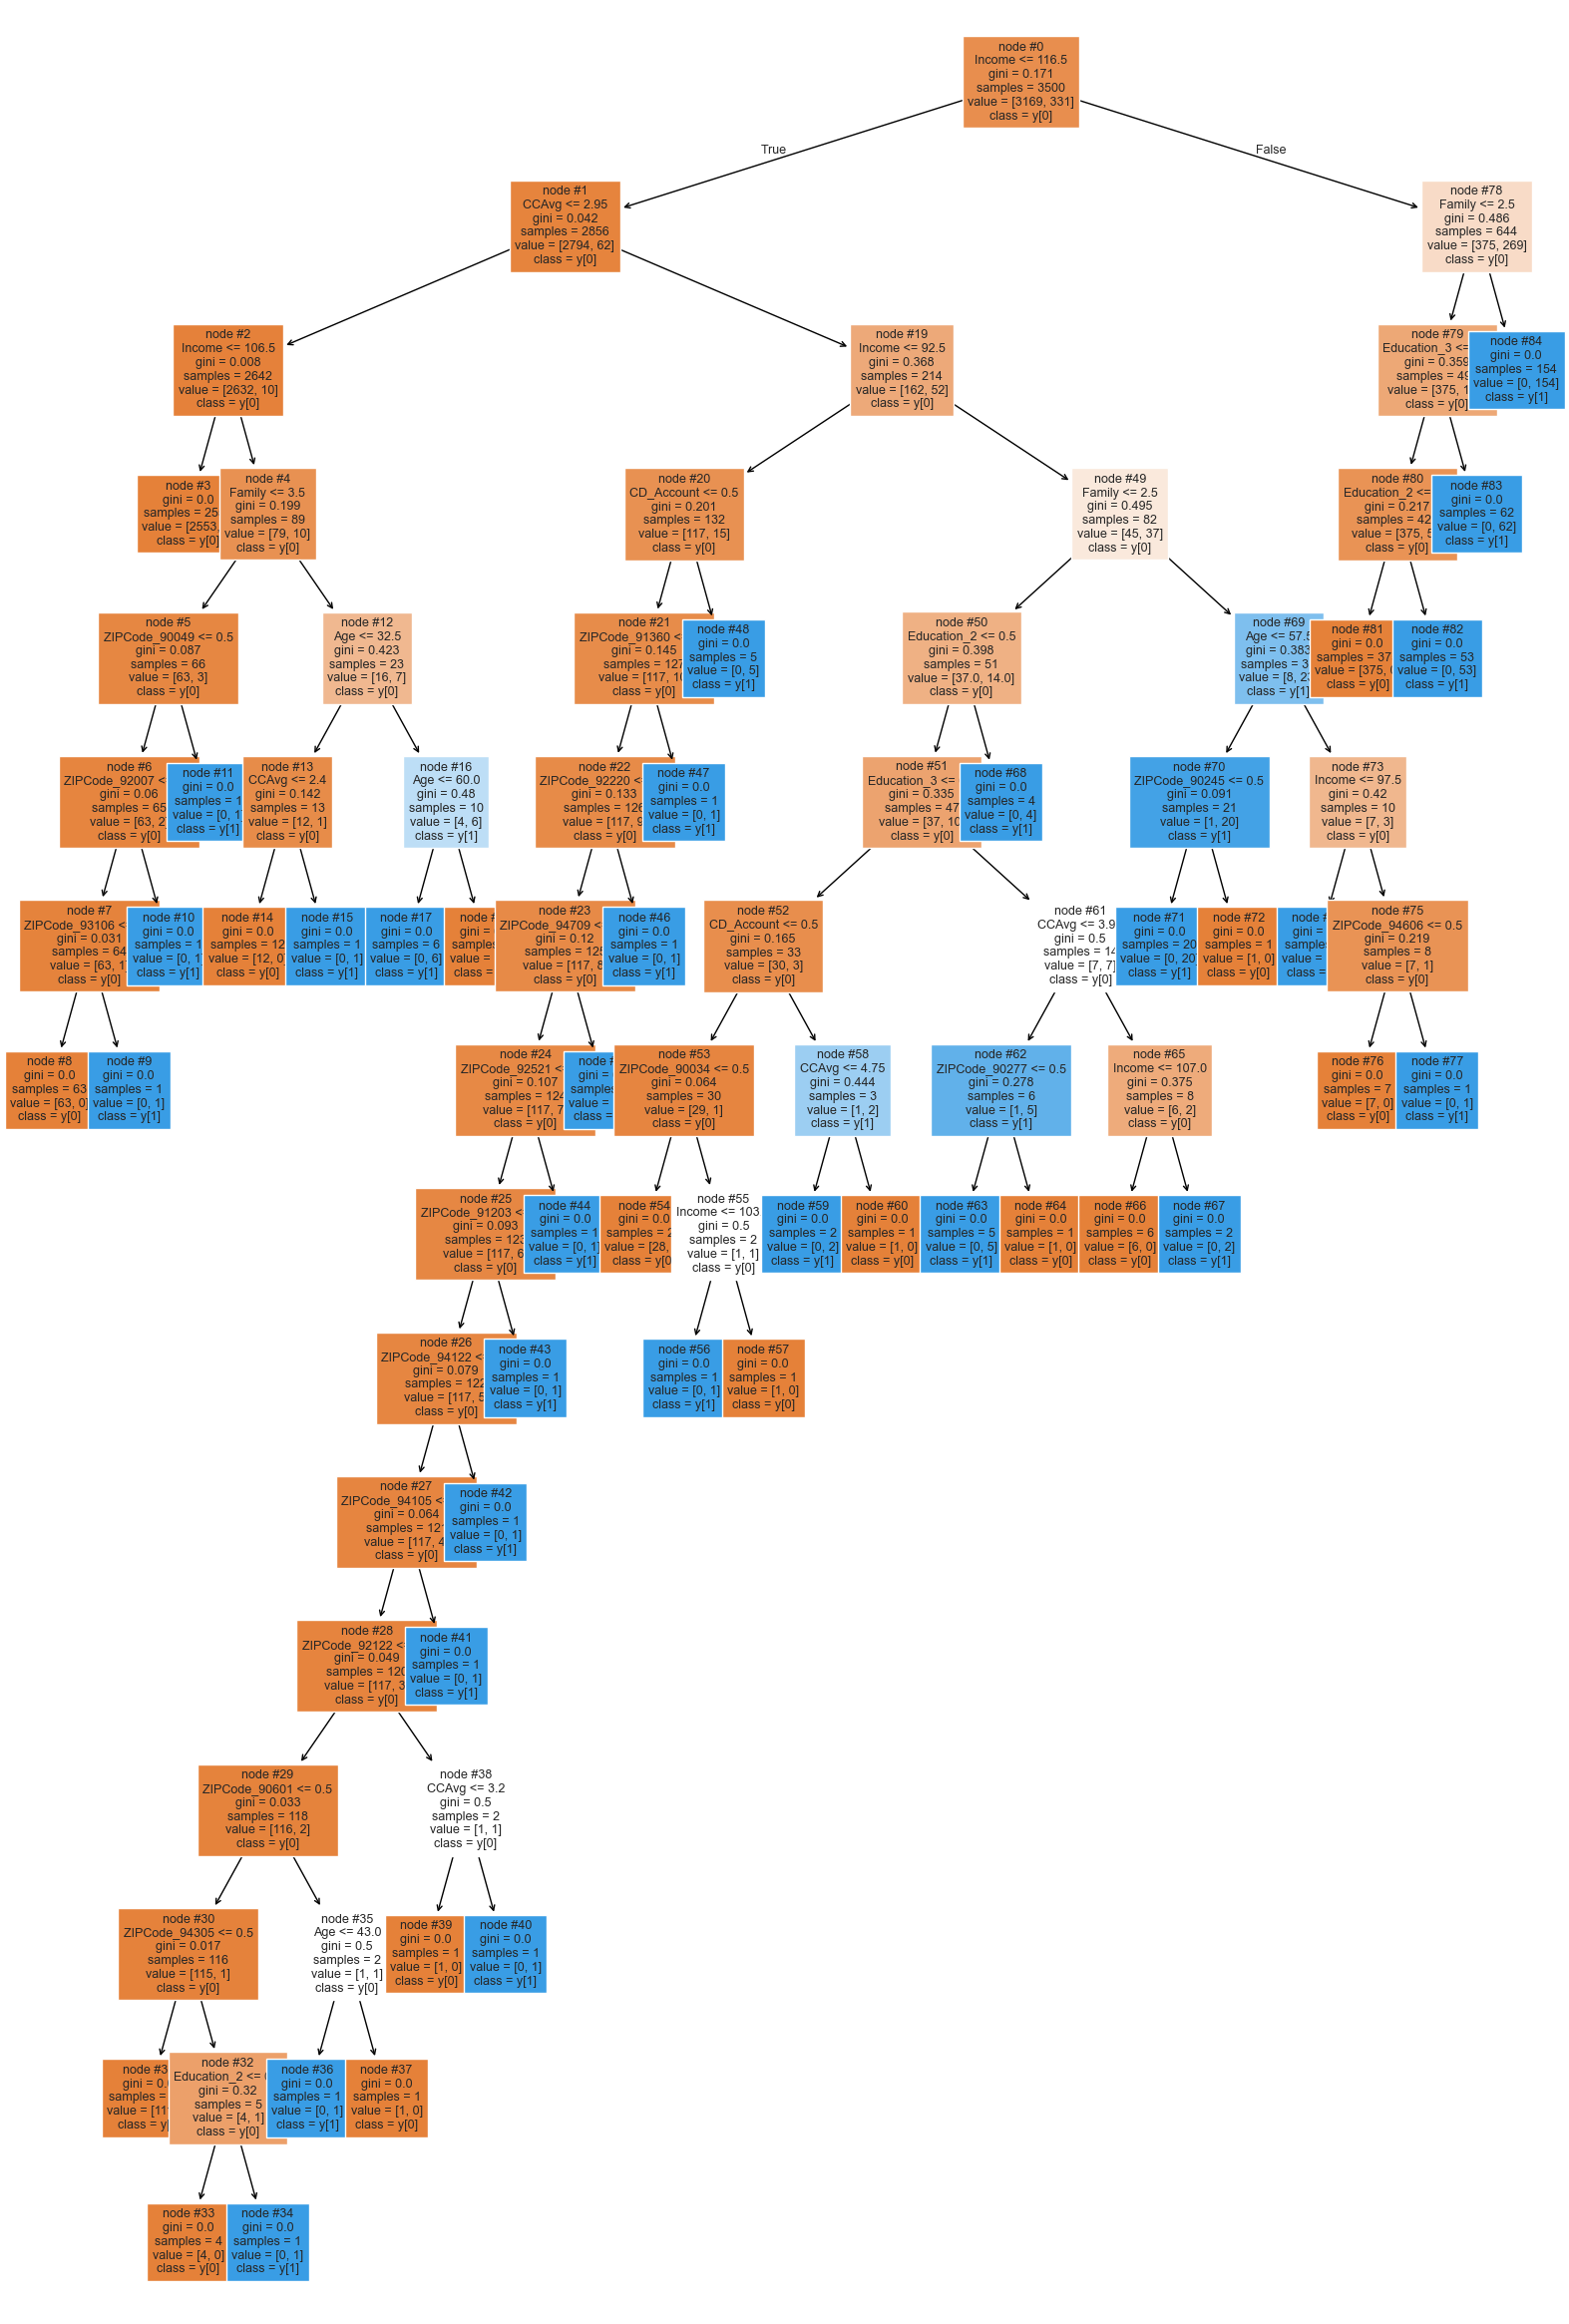

In [32]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [33]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_90049 <= 0.50
|   |   |   |   |   |--- ZIPCode_92007 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_93106 <= 0.50
|   |   |   |   |   |   |   |--- weights: [63.00, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_93106 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_92007 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_90049 >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- CCAvg <= 2.40
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  2.40
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |---

## Model Comparison and Final Model Selection

### Decision Tree (Pre-pruning)

In [34]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)


# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}


# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

In [35]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.987714  0.873112   0.996552  0.930757

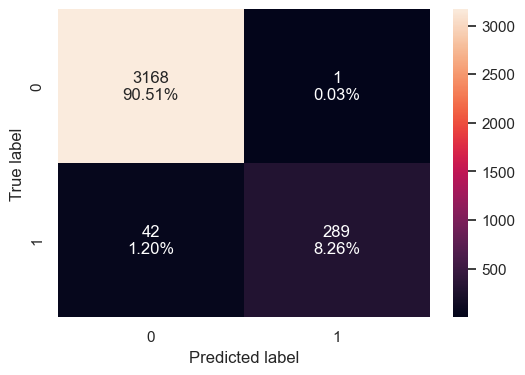

In [36]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [37]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.978667  0.785235        1.0  0.879699

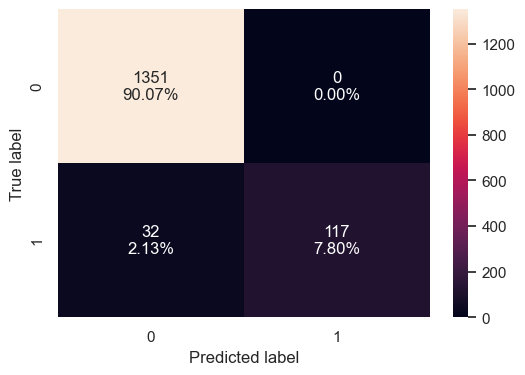

In [38]:
confusion_matrix_sklearn(estimator, X_test, y_test)

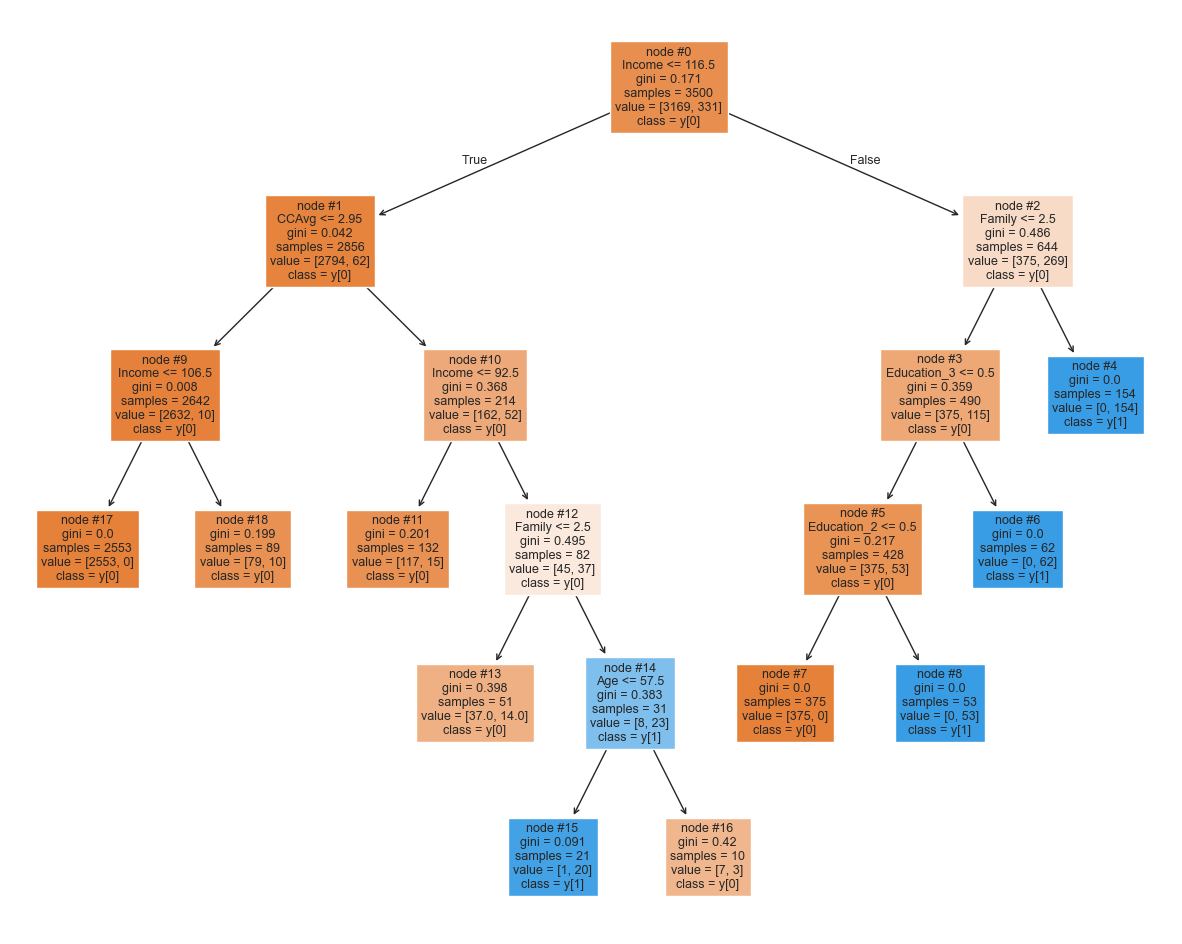

In [39]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

### Cost Complexity Pruning

In [40]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [41]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000276    0.000552
2     0.000279    0.002224
3     0.000381    0.002605
4     0.000476    0.003081
5     0.000500    0.003581
6     0.000513    0.007174
7     0.000527    0.007701
8     0.000544    0.008246
9     0.000545    0.009882
10    0.000625    0.010507
11    0.000700    0.011207
12    0.000762    0.012731
13    0.000882    0.016260
14    0.000940    0.017200
15    0.001305    0.018505
16    0.001647    0.020153
17    0.002333    0.022486
18    0.002407    0.024893
19    0.003294    0.028187
20    0.006473    0.034659
21    0.025146    0.084951
22    0.039216    0.124167
23    0.047088    0.171255

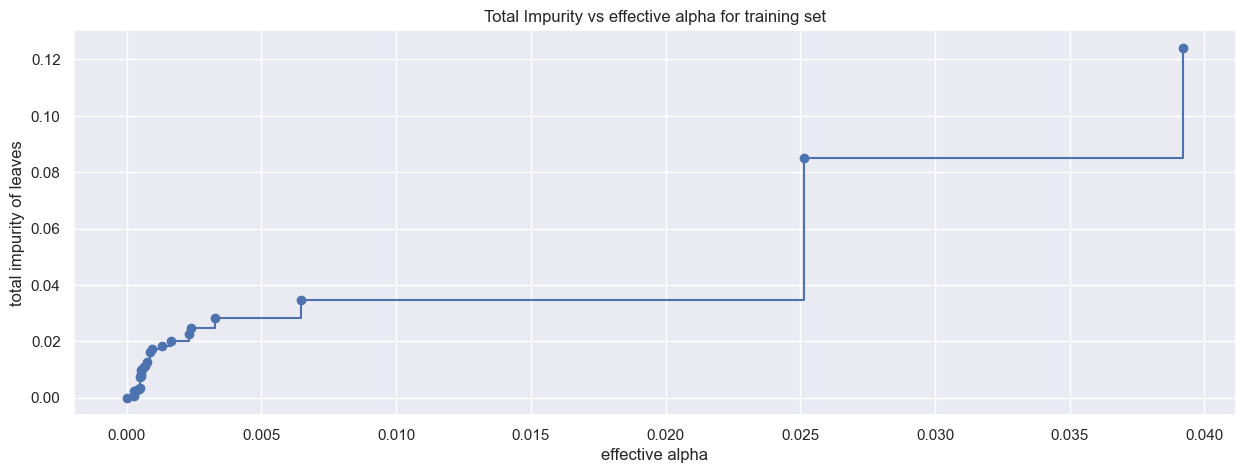

In [42]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [43]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


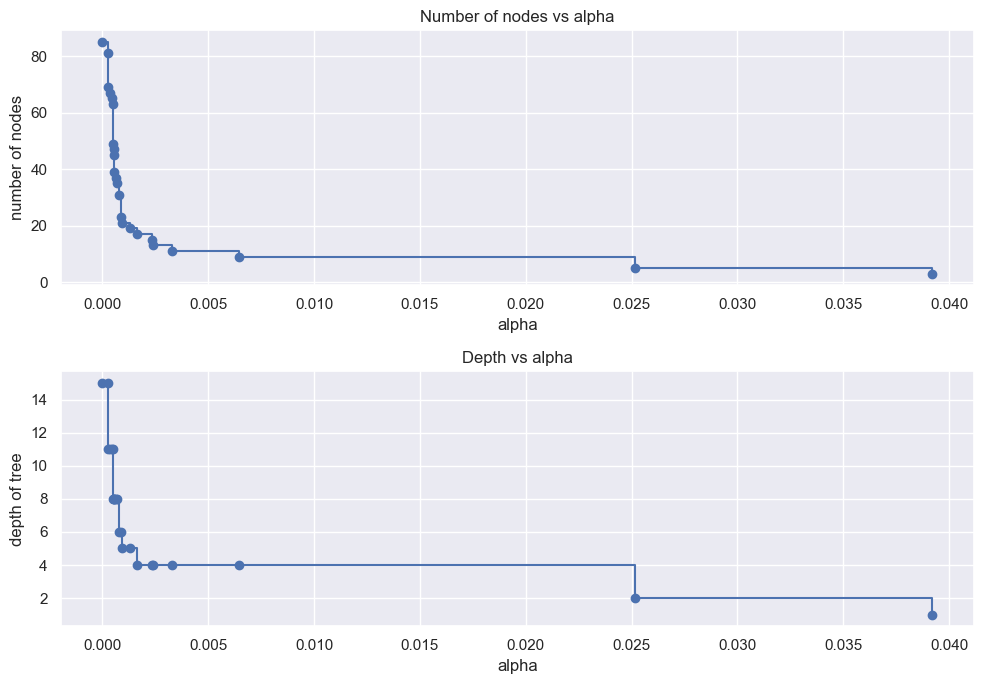

In [44]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [45]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [46]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

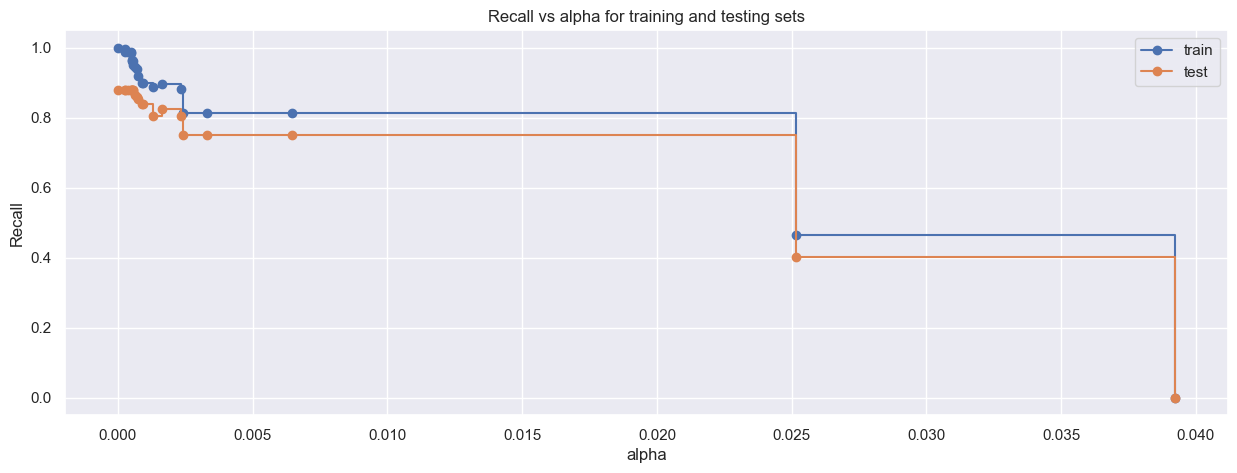

In [47]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [48]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [49]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

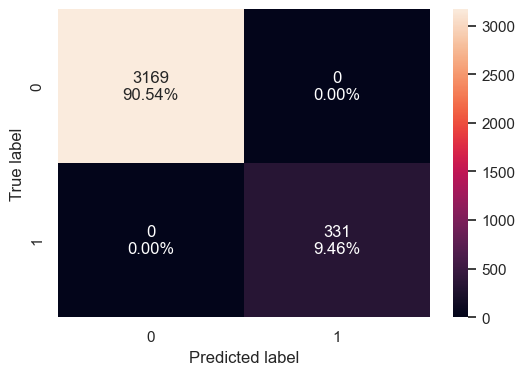

In [50]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* Checking Model on test

In [51]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0     0.984  0.879195   0.956204  0.916084

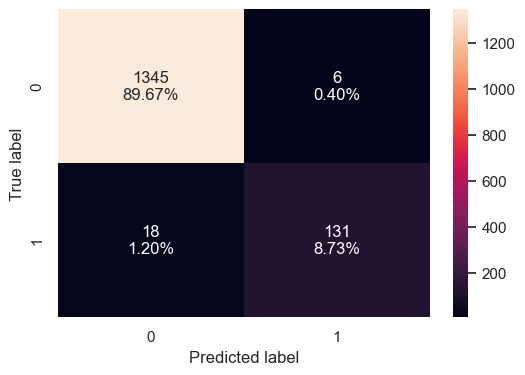

In [52]:
confusion_matrix_sklearn(best_model, X_test, y_test)

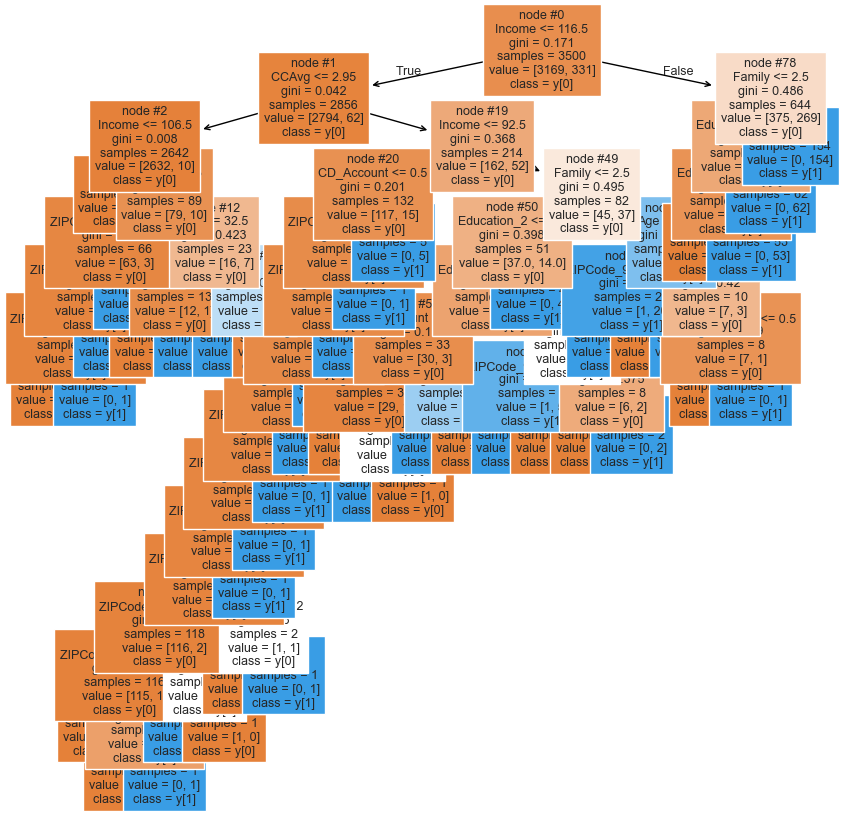

In [53]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [54]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_90049 <= 0.50
|   |   |   |   |   |--- ZIPCode_92007 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_93106 <= 0.50
|   |   |   |   |   |   |   |--- weights: [63.00, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_93106 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_92007 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_90049 >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- CCAvg <= 2.40
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  2.40
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |---

In [55]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income         0.308577
Family         0.246862
Education_2    0.165238
Education_3    0.144207
CCAvg          0.048662
...                 ...
ZIPCode_92110  0.000000
ZIPCode_92109  0.000000
ZIPCode_92106  0.000000
ZIPCode_92104  0.000000
ZIPCode_93009  0.000000

[477 rows x 1 columns]


In [56]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                     0.987714   
Recall                       1.0                     0.873112   
Precision                    1.0                     0.996552   
F1                           1.0                     0.930757   

           Decision Tree (Post-Pruning)  
Accuracy                            1.0  
Recall                              1.0  
Precision                           1.0  
F1                                  1.0

In [57]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.984000                     0.978667   
Recall                  0.879195                     0.785235   
Precision               0.956204                     1.000000   
F1                      0.916084                     0.879699   

           Decision Tree (Post-Pruning)  
Accuracy                       0.984000  
Recall                         0.879195  
Precision                      0.956204  
F1                             0.916084

* Note that the Default Decision Tree and Decision Tree (Post-Prunning) both are performing better than the Pre-pruning model. 
So, let's go for Default model. 

## Actionable Insights and Business Recommendations


####  Analysis has underscored the importance of factors such as Income, Education, Family size, and Average credit card spending (CCAvg), in predicting the likelihood of a customer taking a personal loan.

#### There are three distinct customer profiles:
 
#### High class Clients: These are individuals with high income, advanced/graduate level education, families of 3 or 4 members, and high spending habits. These customers have the highest likelihood of taking personal loans.

#### Medium class Clients: These customers have medium income levels, graduate level education, families of 3 or 4 members, and medium spending habits. They represent our second priority.

#### Low class Clients: These customers have lower income, undergraduate education, families of 3 or 4 members, and low spending habits. Currently, our model has difficulty identifying exceptional cases within this group who may be inclined to take a personal loan. Additionally, customer average spending and mortgage details also play a role in the decision to take a personal loan, as indicated by both EDA and Logistic Regression.

#### I would suggest initially targeting high-class customers with personal relationship managers. These professionals can address any concerns and persuade these customers to opt for a loan with competitive interest rates. Prequalifying for loans can also be a significant draw for these customers. We should have a plan to attract the other two categories i.e. Medium  class and Low class 
#### customers. Then may be we should have separate schemes/policies for Medium  class and Low class, which will benefit them and also will increase the possibility to purchase a loan.



* What recommedations would you suggest to the bank?

___